# ARIMA model


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [120]:
Precios = pd.read_csv('Precios.csv', index_col=1)
Precios

,precio
t,
1,2549.465088
2,2388.010742
3,2470.224365
4,2586.062012
5,2942.189941
...,...
80,4691.332031
81,4717.530762
82,4658.514648


In [121]:
ts = pd.Series(list(Precios['precio']))

In [122]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [123]:
decomposition = seasonal_decompose(Precios, period=12)

In [124]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


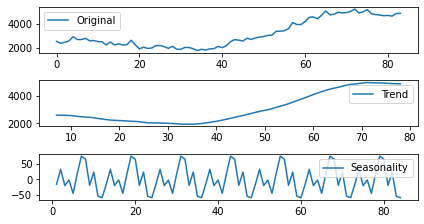

In [125]:
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.tight_layout()

In [126]:
from statsmodels.tsa.stattools import adfuller

In [127]:
ts_log = np.log(ts)
ts_log.dropna(inplace=True)
s_test = adfuller(ts_log, autolag='AIC')
print ("Log transform stationary check p value: ", s_test[1])

Log transform stationary check p value:  0.9501192370468566


Text(0, 0.5, 'First order log diff')

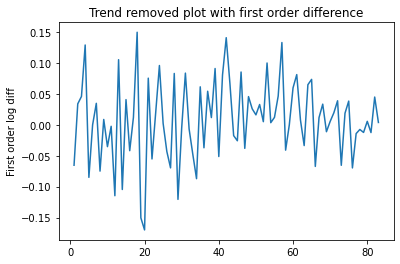

In [128]:
ts_log_diff = ts_log - ts_log.shift()
ts_log_diff.dropna(inplace=True)
plt.title('Trend removed plot with first order difference')
plt.plot(ts_log_diff)
plt.ylabel('First order log diff')

In [129]:
s_test = adfuller(ts_log_diff, autolag='AIC')
print ("First order difference stationary check p value: ", s_test[1] )

First order difference stationary check p value:  1.0772384737133757e-19


In [130]:
moving_avg = ts_log.rolling(12).mean()

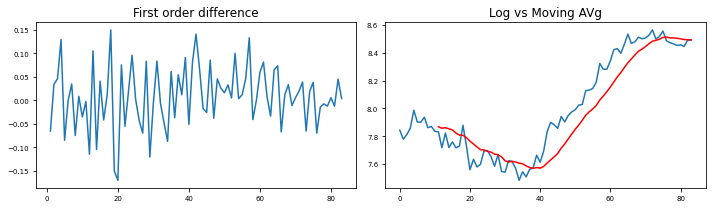

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
ax1.set_title('First order difference')
ax1.tick_params(axis='x', labelsize=7)
ax1.tick_params(axis='y', labelsize=7)
ax1.plot(ts_log_diff)
ax2.plot(ts_log)
ax2.set_title('Log vs Moving AVg')
ax2.tick_params(axis='x', labelsize=7)
ax2.tick_params(axis='y', labelsize=7)
ax2.plot(moving_avg, color='red')
plt.tight_layout()

Text(0.5, 0, 'Lags')

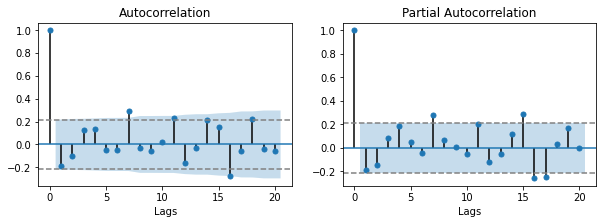

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,3))
# ACF chart
fig = sm.graphics.tsa.plot_acf(ts_log_diff.values.squeeze(), lags=20,ax=ax1)
# draw 95% confidence interval line
ax1.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax1.set_xlabel('Lags')
# PACF chart
fig = sm.graphics.tsa.plot_pacf(ts_log_diff, lags=20, ax=ax2)
# draw 95% confidence interval line
ax2.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
ax2.set_xlabel('Lags')

In [144]:
# build model
model = sm.tsa.ARIMA(ts_log, order=(1,0,0))
results_ARIMA = model.fit(disp=-1)
ts_predict = results_ARIMA.predict()
# Evaluate model
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)
print("Mean Absolute Error: ", mean_squared_error(ts_log.values,ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.values, ts_predict.values)))
# check autocorrelation
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.resid.values))

AIC:  -211.5766310179692
BIC:  -204.28418062143925
Mean Absolute Error:  0.004959769000063584
Root Mean Squared Error:  0.07042562743819598
Durbin-Watson statistic : 2.0218400095381774


AIC:  -211.5766310179692
BIC:  -204.28418062143925
Mean Absolute Error:  0.053355808735121114
Root Mean Squared Error:  0.07042562743819598
Durbin-Watson statistic : 2.0218400095381774


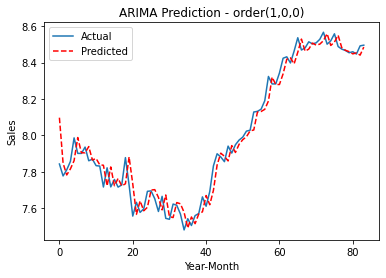

In [171]:
odel = sm.tsa.ARIMA(ts_log, order=(1,0,0))
results_ARIMA = model.fit(disp=-1)
ts_predict = results_ARIMA.predict()
plt.title('ARIMA Prediction - order(1,0,0)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.xlabel('Year-Month')
plt.ylabel('Sales')
plt.legend(loc='best')
print("AIC: ", results_ARIMA.aic)
print("BIC: ", results_ARIMA.bic)
print("Mean Absolute Error: ", mean_absolute_error(ts_log.values,
ts_predict.values))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(ts_log.
values, ts_predict.values)))
# check autocorrelation
print("Durbin-Watson statistic :", sm.stats.durbin_watson(results_ARIMA.
resid.values))

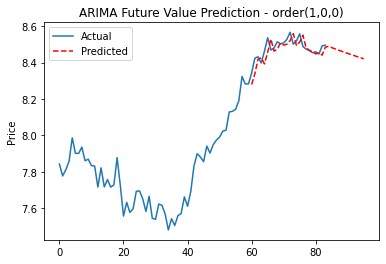

In [176]:
# final model
model = sm.tsa.ARIMA(ts_log, order=(1,0,0))
results_ARIMA = model.fit(disp=-1)
# predict future values
ts_predict = results_ARIMA.predict(60,95)
plt.title('ARIMA Future Value Prediction - order(1,0,0)')
plt.plot(ts_log, label='Actual')
plt.plot(ts_predict, 'r--', label='Predicted')
plt.ylabel('Price')
plt.legend(loc='best')

In [179]:
oil = pd.read_stata('/home/alvin/Desktop/Python/Oil.dta', index_col='t')
oil.shape

(1382, 3)

In [180]:
oil.head()

,spot,lspot,p
t,,,
1.0,18.580000,2.922086,NaN
2.0,18.540001,2.919931,-0.215507
3.0,18.600000,2.923162,0.323081
4.0,18.700001,2.928524,0.536203
5.0,18.750000,2.931194,0.267029
